## Observations and Insights

## Dependencies and starter code

In [141]:
%matplotlib notebook

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [143]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [144]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [145]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groupby = combined_data_df.groupby("Drug Regimen")

tumor_volume_mean = drug_groupby["Tumor Volume (mm3)"].mean()

tumor_volume_median = drug_groupby["Tumor Volume (mm3)"].median()

tumor_volume_variance = drug_groupby["Tumor Volume (mm3)"].var()

tumor_volume_std = drug_groupby["Tumor Volume (mm3)"].std()

tumor_volume_sem = drug_groupby["Tumor Volume (mm3)"].sem()

drug_summary_stat = pd.DataFrame({"Mean": tumor_volume_mean, 
                                  "Median": tumor_volume_median, 
                                  "Variance": tumor_volume_variance, 
                                  "Standard Deviation": tumor_volume_std, 
                                  "SEM": tumor_volume_sem
                                 })
drug_summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

<IPython.core.display.Javascript object>


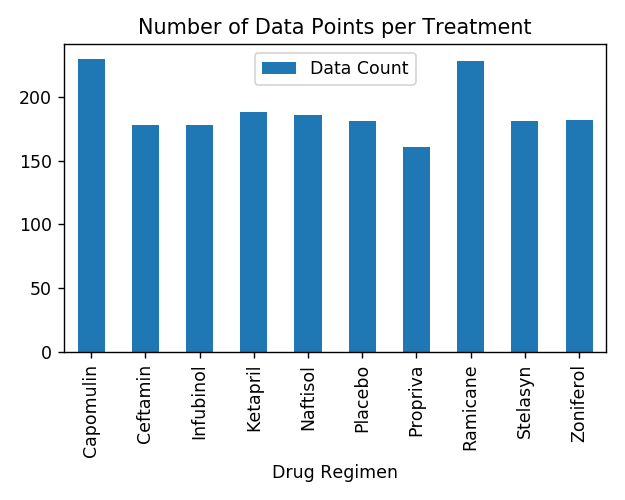

In [147]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = combined_data_df.groupby(["Drug Regimen"]).count()
datapoint_df = grouped_df[["Mouse ID"]]
datapoint_df = datapoint_df.rename(columns={"Mouse ID":"Data Count"})
datapoint_df.plot(kind="bar",figsize=(5,4))
plt.title("Number of Data Points per Treatment")

plt.show()
plt.tight_layout()

In [148]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(datapoint_df))
tick_locations = [value for value in x_axis]
datapoint_df = datapoint_df.reset_index()

<IPython.core.display.Javascript object>


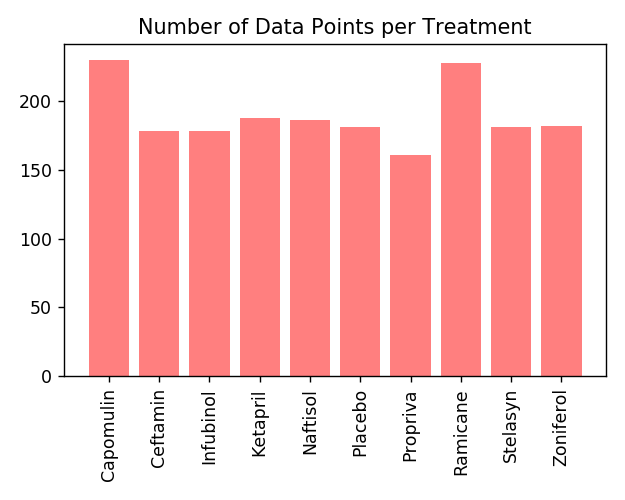

In [149]:
plt.figure(figsize=(5,4))
#plt.figure()
plt.bar(x_axis, datapoint_df["Data Count"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, datapoint_df["Drug Regimen"], rotation="vertical")
plt.title("Number of Data Points per Treatment")

plt.show()
plt.tight_layout()

## Pie plots

In [150]:
gender_title = combined_data_df.groupby("Sex")
gender_pie_plot = gender_title["Sex"].count()
gender_pie_plot

Sex
Female    935
Male      958
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


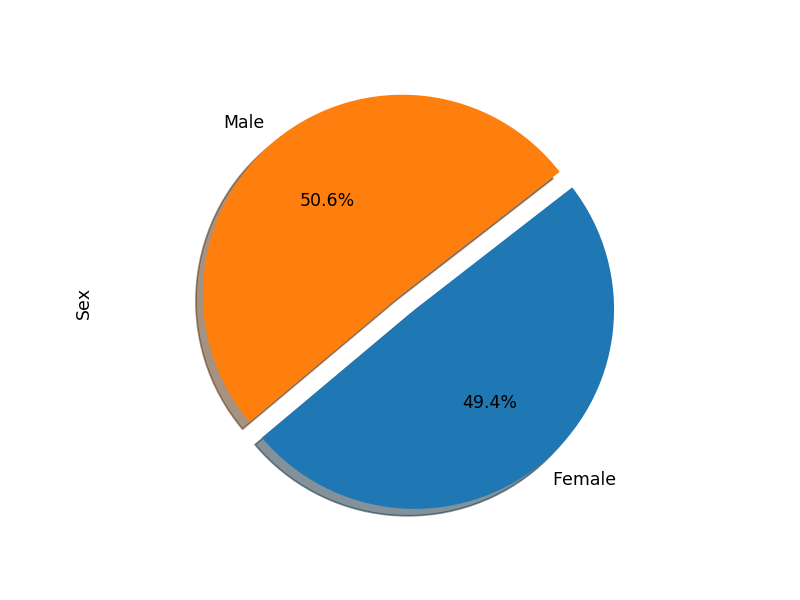

(-1.1128927760294711,
 1.1910988684427344,
 -1.203796622053065,
 1.114017714665686)

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.1, 0)
gender_pie_plot.plot(kind='pie', explode=explode, autopct='%1.1f%%',startangle=220, shadow=True)
plt.axis("equal")

In [152]:
import matplotlib.pyplot as plt

gender = gender_title["Mouse ID"].count().tolist()
gender

[935, 958]

In [153]:
labels = gender_title.count().reset_index()
labels = labels["Sex"].tolist()
#labels = ["Female","Male"]

<IPython.core.display.Javascript object>


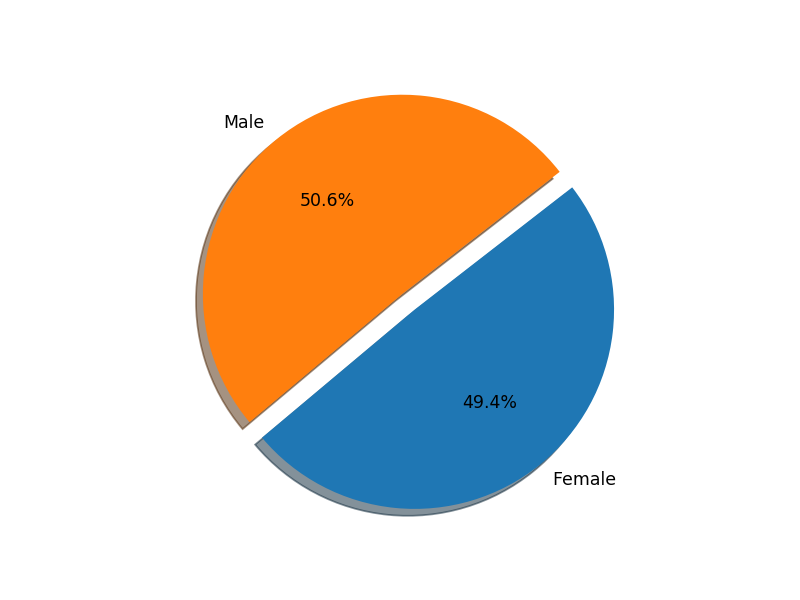

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.1, 0)

plt.pie(gender, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=220)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [156]:
#sorting the data by drug regimen then mouse id and then timepoint
sorted_df = combined_data_df.sort_values(["Drug Regimen","Mouse ID","Timepoint"],ascending = True)
#created df that only captures the final tumor volume for each drug/mouse id (i.e at timepoint = 45)
final_tumor_volume_df = sorted_df.loc[sorted_df["Timepoint"]== 45]
final_tumor_volume_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [157]:
#to find the mean of the final tumor volume, i.e. at timepoint = 45 to find the most promising drug.
best_drug_df = final_tumor_volume_df.groupby("Drug Regimen")
final_tumor_volume_mean = best_drug_df["Tumor Volume (mm3)"].mean()
final_tumor_volume_mean

Drug Regimen
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: Tumor Volume (mm3), dtype: float64

In [158]:
# Dataframe for the final tumor volume of each mouse across four of the most promising treatment regimens.
# From the final_tumor_volume_mean df Ramicane, Capomulin, Ceftamin, Infubinol are the four most promising treatment regimens.
only_Ramicane_Capomulin_Ceftamin_Infubinol_final_tumor = final_tumor_volume_df.loc[(final_tumor_volume_df["Drug Regimen"]=="Ramicane")|
                                                                                   (final_tumor_volume_df["Drug Regimen"]=="Capomulin")|
                                                                                   (final_tumor_volume_df["Drug Regimen"]=="Ceftamin")|
                                                                                   (final_tumor_volume_df["Drug Regimen"]=="Infubinol"),:]
only_Ramicane_Capomulin_Ceftamin_Infubinol_final_tumor.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [159]:
# From the final_tumor_volume_mean df Ramicane, Capomulin, Ceftamin, Infubinol are the four most promising treatment regimens
# to create list of final tumor volume for Ramicane
ramicane_final_tumor_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"]=="Ramicane"]
ramicane_final_tumor_df = ramicane_final_tumor_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_final_tumor_df = ramicane_final_tumor_df["Tumor Volume (mm3)"]
ramicane_final_tumor_df.head()

0    22.050126
1    29.128472
2    30.276232
3    30.564625
4    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [160]:
# to create list of final tumor volume for Capomulin
capomulin_final_tumor_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"]=="Capomulin"]
capomulin_final_tumor_df = capomulin_final_tumor_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_final_tumor_df = capomulin_final_tumor_df["Tumor Volume (mm3)"]
capomulin_final_tumor_df.head()

0    23.343598
1    28.430964
2    28.484033
3    31.023923
4    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [161]:
# to create list of final tumor volume for Ceftamin

ceftamin_final_tumor_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"]=="Ceftamin"]
ceftamin_final_tumor_df = ceftamin_final_tumor_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_final_tumor_df = ceftamin_final_tumor_df["Tumor Volume (mm3)"]
ceftamin_final_tumor_df.head()

0    59.741901
1    59.851956
2    61.386660
3    61.433892
4    61.849023
Name: Tumor Volume (mm3), dtype: float64

In [162]:
# to create list of final tumor volume for Infubinol

infubinol_final_tumor_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"]=="Infubinol"]
infubinol_final_tumor_df = infubinol_final_tumor_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infubinol_final_tumor_df = infubinol_final_tumor_df["Tumor Volume (mm3)"]
infubinol_final_tumor_df.head()

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
Name: Tumor Volume (mm3), dtype: float64

In [163]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ramicane_final_tumor_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f"The lower quartile of ramicane_final_tumor_df is: {round(lowerq,2)}")
print(f"The upper quartile of ramicane_final_tumor_df is: {round(upperq,2)}")
print(f"The interquartile range of ramicane_final_tumor_df is: {round(iqr,2)}")
print(f"The the median of ramicane_final_tumor_df is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

print("****************************************************************")

quartiles = capomulin_final_tumor_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f"The lower quartile of capomulin_final_tumor_df is: {round(lowerq,2)}")
print(f"The upper quartile of capomulin_final_tumor_df is: {round(upperq,2)}")
print(f"The interquartile range of capomulin_final_tumor_df is: {round(iqr,2)}")
print(f"The the median of capomulin_final_tumor_df is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

print("****************************************************************")

quartiles = ceftamin_final_tumor_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f"The lower quartile of ceftamin_final_tumor_df is: {round(lowerq,2)}")
print(f"The upper quartile of ceftamin_final_tumor_df is: {round(upperq,2)}")
print(f"The interquartile range of ceftamin_final_tumor_df is: {round(iqr,2)}")
print(f"The the median of ceftamin_final_tumor_df is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

print("****************************************************************")

quartiles = infubinol_final_tumor_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f"The lower quartile of infubinol_final_tumor_df is: {round(lowerq,2)}")
print(f"The upper quartile of infubinol_final_tumor_df is: {round(upperq,2)}")
print(f"The interquartile range of infubinol_final_tumor_df is: {round(iqr,2)}")
print(f"The the median of infubinol_final_tumor_df is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

print("****************************************************************")


The lower quartile of ramicane_final_tumor_df is: 30.98
The upper quartile of ramicane_final_tumor_df is: 38.51
The interquartile range of ramicane_final_tumor_df is: 7.53
The the median of ramicane_final_tumor_df is: 34.85 
Values below 19.69 could be outliers.
Values above 49.8 could be outliers.
****************************************************************
The lower quartile of capomulin_final_tumor_df is: 32.38
The upper quartile of capomulin_final_tumor_df is: 40.16
The interquartile range of capomulin_final_tumor_df is: 7.78
The the median of capomulin_final_tumor_df is: 37.31 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
****************************************************************
The lower quartile of ceftamin_final_tumor_df is: 61.43
The upper quartile of ceftamin_final_tumor_df is: 67.53
The interquartile range of ceftamin_final_tumor_df is: 6.09
The the median of ceftamin_final_tumor_df is: 64.3 
Values below 52.29 could be outliers.
Valu

In [164]:
final_tumor_df = only_Ramicane_Capomulin_Ceftamin_Infubinol_final_tumor[["Drug Regimen","Tumor Volume (mm3)"]]
#final_tumor_df = final_tumor_df.set_index("Drug Regimen")
final_tumor_df.head()
data = [ramicane_final_tumor_df,capomulin_final_tumor_df,ceftamin_final_tumor_df,infubinol_final_tumor_df]

<IPython.core.display.Javascript object>


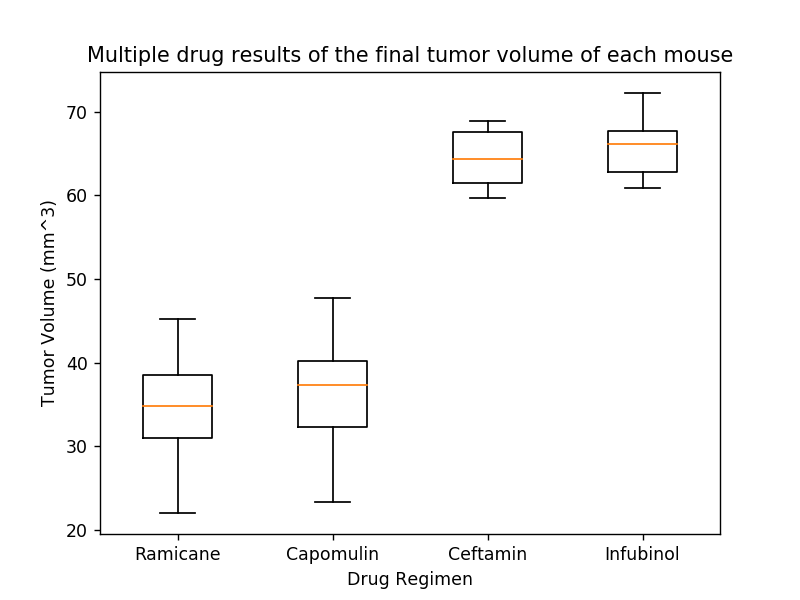

In [165]:
fig1, ax1 = plt.subplots()
ax1.set_title('Multiple drug results of the final tumor volume of each mouse')
ax1.boxplot(data)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm^3)')
plt.xticks([1, 2, 3,4], ["Ramicane","Capomulin","Ceftamin","Infubinol"])
plt.show()

## Line and scatter plots

In [166]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot_df = combined_data_df.loc[(combined_data_df["Mouse ID"]=="s185"),:]
lineplot_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


<IPython.core.display.Javascript object>


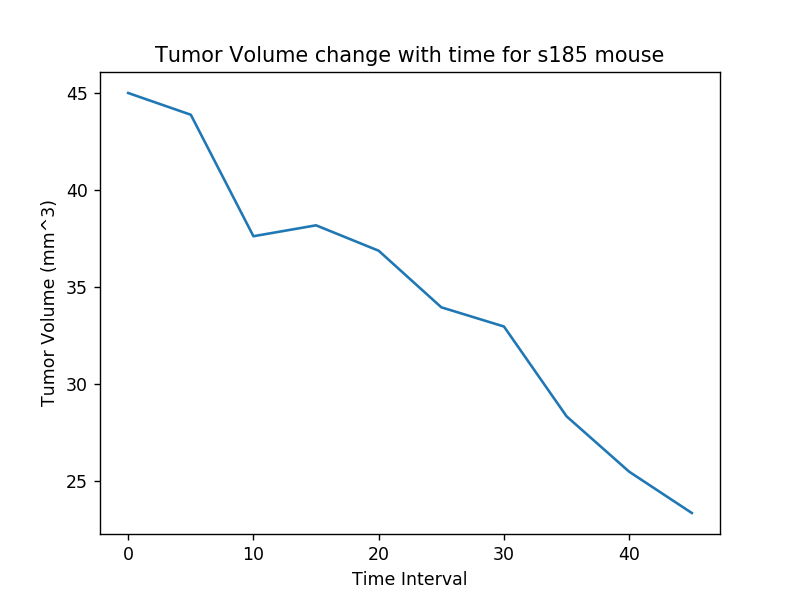

Text(0.5, 1.0, 'Tumor Volume change with time for s185 mouse')

In [167]:
plt.plot(lineplot_df["Timepoint"],lineplot_df["Tumor Volume (mm3)"])
plt.xlabel("Time Interval")
plt.ylabel("Tumor Volume (mm^3)")
plt.title("Tumor Volume change with time for s185 mouse")

In [168]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = combined_data_df.loc[(combined_data_df["Drug Regimen"]=="Capomulin"),:]
cap_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [169]:
cap_reduced_df = cap_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876


In [170]:
mean_cap_df = pd.DataFrame(cap_reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean())
mean_cap_df = mean_cap_df.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
mean_cap_df = mean_cap_df.reset_index()

<IPython.core.display.Javascript object>


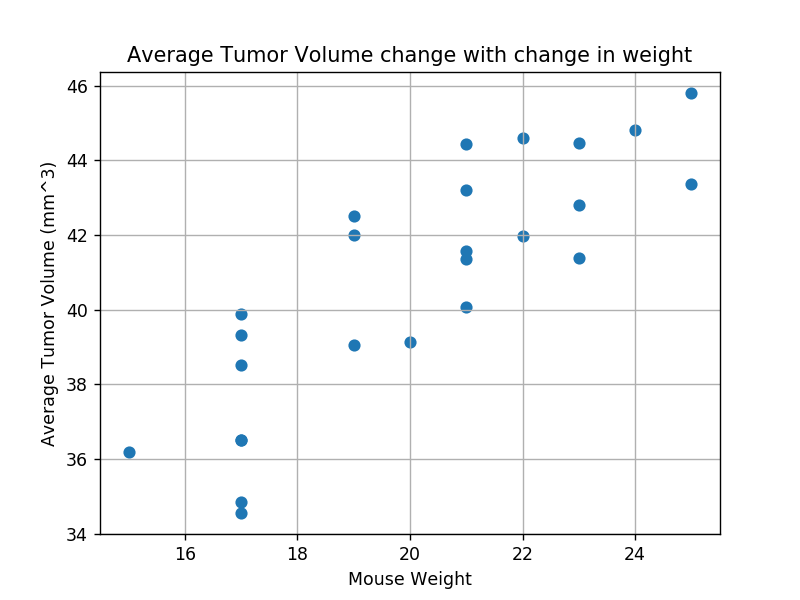

In [171]:
plt.scatter(mean_cap_df["Weight (g)"], mean_cap_df["Average Volume"])
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm^3)")
plt.title("Average Tumor Volume change with change in weight")
plt.grid()

In [172]:
# Calculate the correlation coefficient
mouse_weight = mean_cap_df.iloc[:,1]
avg_tumor_volume = mean_cap_df.iloc[:,2]
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouse_weight,avg_tumor_volume)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


<IPython.core.display.Javascript object>


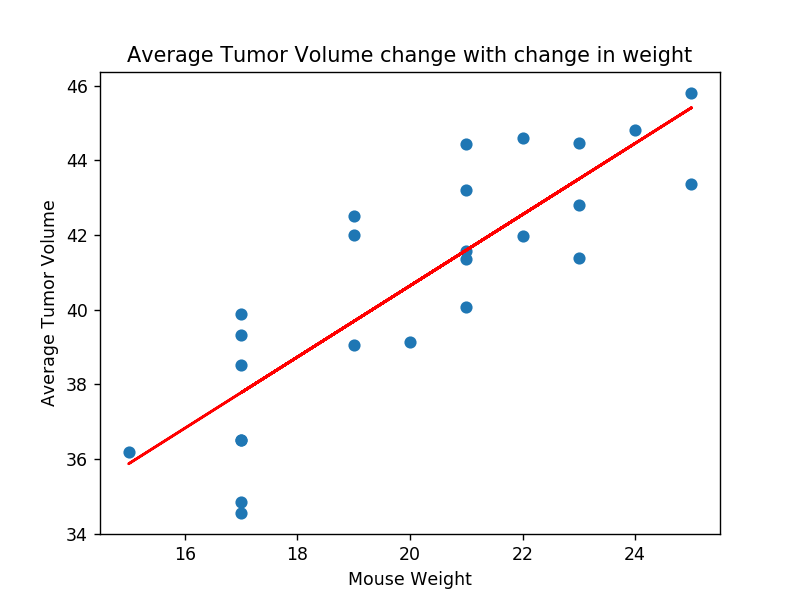

In [174]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mean_cap_df['Weight (g)']
y_values = mean_cap_df['Average Volume']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Average Tumor Volume change with change in weight")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

In [ ]:
#Analysis:
#1) Data comprised of almost equal percentage of male to female mouses
#2) With increase in the mouse's weight, there was an increase in the average tumor volume as well. 